In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [114]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal 

In [115]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time,best_epochs,learning_rate,regularization
0,PubMed,0.500,66,0.9187,0.9254,32.17,145,0.01,1.0
1,PubMed,0.100,42,0.7938,0.8170,37.39,118,0.01,0.1
2,PubMed,0.100,43,0.7797,0.8029,32.53,89,0.01,0.1
3,PubMed,0.100,44,0.8255,0.8856,33.64,40,0.01,0.1
4,PubMed,0.100,42,0.7938,0.8170,35.64,118,0.01,0.3
...,...,...,...,...,...,...,...,...,...
311,CiteSeer,0.875,43,0.7053,0.6890,9.92,53,0.01,1.0
312,CiteSeer,0.875,44,0.7602,0.7468,10.13,48,0.01,1.0
313,CiteSeer,0.875,42,0.7018,0.6844,9.98,56,0.01,2.0
314,CiteSeer,0.875,43,0.7065,0.6922,10.01,53,0.01,2.0


In [116]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [123]:
df_agg[df_agg['dataset'] == 'PubMed'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization       AUC                  AP          
                                            mean       std      mean       std
104  PubMed      0.8750            2.0  0.931233  0.003775  0.932567  0.003232
103  PubMed      0.8750            1.0  0.931500  0.003666  0.932733  0.003213
102  PubMed      0.8750            0.5  0.931600  0.003830  0.932833  0.003288
101  PubMed      0.8750            0.3  0.931367  0.003656  0.932600  0.003143
100  PubMed      0.8750            0.1  0.931233  0.004140  0.932533  0.003453
99   PubMed      0.7500            2.0  0.928667  0.003037  0.930367  0.004994
98   PubMed      0.7500            1.0  0.928633  0.002970  0.930300  0.004939
97   PubMed      0.7500            0.5  0.928633  0.002566  0.930300  0.004766
96   PubMed      0.7500            0.3  0.928600  0.002488  0.930167  0.004648
95   PubMed      0.7500            0.1  0.928467  0.002458  0.930067  0.004477
94   PubMed      0.5000            2.0  0.923933  0.003553  0.929100  0.005384
93   PubMed      0.5000            1.0  0.922875  0.003741  0.928425  0.004409
92   PubMed      0.5000            0.5  0.924433  0.002875  0.929800  0.004851
91   PubMed      0.5000            0.3  0.924567  0.002892  0.929867  0.004821
90   PubMed      0.5000            0.1  0.924667  0.002797  0.929933  0.004792
89   PubMed      0.3375            2.0  0.915500  0.009756  0.921467  0.009313
88   PubMed      0.3375            1.0  0.915733  0.009908  0.921633  0.009420
87   PubMed      0.3375            0.5  0.915767  0.009961  0.921667  0.009474
86   PubMed      0.3375            0.3  0.915767  0.009902  0.921667  0.009474
85   PubMed      0.3375            0.1  0.915800  0.009954  0.921700  0.009465
84   PubMed      0.2250            2.0  0.871867  0.008411  0.884533  0.011316
83   PubMed      0.2250            1.0  0.872733  0.008894  0.885333  0.011724
82   PubMed      0.2250            0.5  0.872733  0.008565  0.885367  0.011343
81   PubMed      0.2250            0.3  0.872867  0.008718  0.885567  0.011585
80   PubMed      0.2250            0.1  0.873000  0.008773  0.885667  0.011628
79   PubMed      0.1500            2.0  0.828200  0.049120  0.850333  0.048984
78   PubMed      0.1500            1.0  0.828033  0.049186  0.849967  0.049103
77   PubMed      0.1500            0.5  0.828000  0.049037  0.849867  0.049032
76   PubMed      0.1500            0.3  0.828000  0.049037  0.849933  0.048995
75   PubMed      0.1500            0.1  0.828133  0.048922  0.850000  0.048937
74   PubMed      0.1000            2.0  0.799533  0.023263  0.835433  0.043815
73   PubMed      0.1000            1.0  0.799633  0.023200  0.835500  0.043832
72   PubMed      0.1000            0.5  0.799800  0.023249  0.835400  0.044128
71   PubMed      0.1000            0.3  0.799567  0.023487  0.835167  0.044242
70   PubMed      0.1000            0.1  0.799667  0.023457  0.835167  0.044242

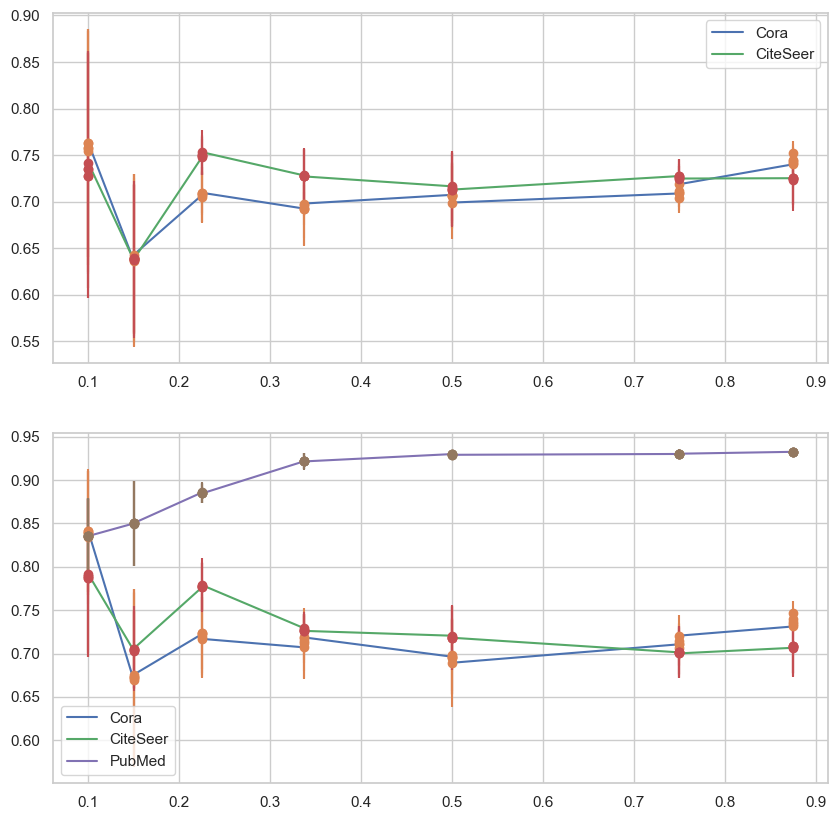

In [117]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], label='Cora')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AUC']['std'], fmt='o')
# axist 0 plot for CiteSeer
ax[0].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], label='CiteSeer')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['std'], fmt='o')
# add legend
ax[0].legend()
# axis 1 plot for AP
ax[1].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], label='Cora')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AP']['std'], fmt='o')
# axist 1 plot for CiteSeer
ax[1].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], label='CiteSeer')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['std'], fmt='o')
# axist 1 plot for PubMed
ax[1].plot(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'],
           df_agg[df_agg['dataset'] == 'PubMed']['AP']['mean'], label='PubMed')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'PubMed']['split_ratio'],
               df_agg[df_agg['dataset'] == 'PubMed']['AP']['mean'],
               yerr=df_agg[df_agg['dataset'] == 'PubMed']['AP']['std'], fmt='o')
# add legend
ax[1].legend()

In [118]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [119]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
              mean       std      mean       std
dataset                                         
CiteSeer  0.811667  0.009888  0.754300  0.007074
Cora      0.793267  0.007012  0.754633  0.007419
PubMed    0.841800  0.005336  0.790400  0.004814